# Results of RDFIA's TME 6 and 7

## Imports

### Sys and Python

In [5]:
import sys
sys.path.insert(0, '../src/')

import warnings
warnings.filterwarnings('ignore')

import json
import math
import re

from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Graphics

In [6]:
%matplotlib inline
import pandas as pd

import cufflinks as cf; cf.go_offline(connected=True)
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import plotly as py
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.graph_objs import graph_objs

from __init__ import *

### Source files

In [7]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Loading results data

In [69]:
loss_acc_001 = pd.read_csv('results/loss_acc_0.01.csv')
train_loss_001 = pd.read_csv('results/train_loss_0.01.csv')

loss_acc_001_512 = pd.read_csv('results/loss_acc_0.01_512.csv')
train_loss_001_512 = pd.read_csv('results/train_loss_0.01_512.csv')

loss_acc = pd.read_csv('results/loss_acc_0.05.csv')
train_loss = pd.read_csv('results/train_loss_0.05.csv')

loss_acc_512 = pd.read_csv('results/loss_acc_0.05_512.csv')
train_loss_512 = pd.read_csv('results/train_loss_0.05_512.csv')

norm_loss_acc = pd.read_csv('results/norm_loss_acc_0.05.csv')
norm_train_loss = pd.read_csv('results/norm_train_loss_0.05.csv')

data_augmentation_loss_acc = pd.read_csv('results/data_augmentation_loss_acc_0.05.csv')
data_augmentation_train_loss = pd.read_csv('results/data_augmentation_train_loss_0.05.csv')

momentum_expLR_loss_acc = pd.read_csv('results/momentum_explr_loss_acc_0.05.csv')
momentum_expLR_train_loss = pd.read_csv('results/momentum_explr_train_loss_0.05.csv')

momentum_stepLR_loss_acc = pd.read_csv('results/momentum_steplr_loss_acc_0.05.csv')
momentum_stepLR_train_loss = pd.read_csv('results/momentum_steplr_train_loss_0.05.csv')

momentum_multistepLR_loss_acc = pd.read_csv('results/momentum_multisteplr_loss_acc_0.05.csv')
momentum_multistepLR_train_loss = pd.read_csv('results/momentum_multisteplr_train_loss_0.05.csv')

adam_loss_acc_0001 = pd.read_csv('results/adam_loss_acc_0.001.csv')
adam_train_loss_0001 = pd.read_csv('results/adam_train_loss_0.001.csv')

adadelta_loss_acc = pd.read_csv('results/adadelta_loss_acc_avg.csv')
adadelta_train_loss = pd.read_csv('results/adadelta_train_loss.csv')

dropout_loss_acc = pd.read_csv('results/momentum_explr_dropout_loss_acc_0.05.csv')
dropout_train_loss = pd.read_csv('results/momentum_explr_dropout_train_loss_0.05.csv')

batch_norm_loss_acc = pd.read_csv('results/batch_norm_loss_acc_0.05.csv')
batch_norm_train_loss = pd.read_csv('results/batch_norm_train_loss_0.05.csv')


## Answers

### 15

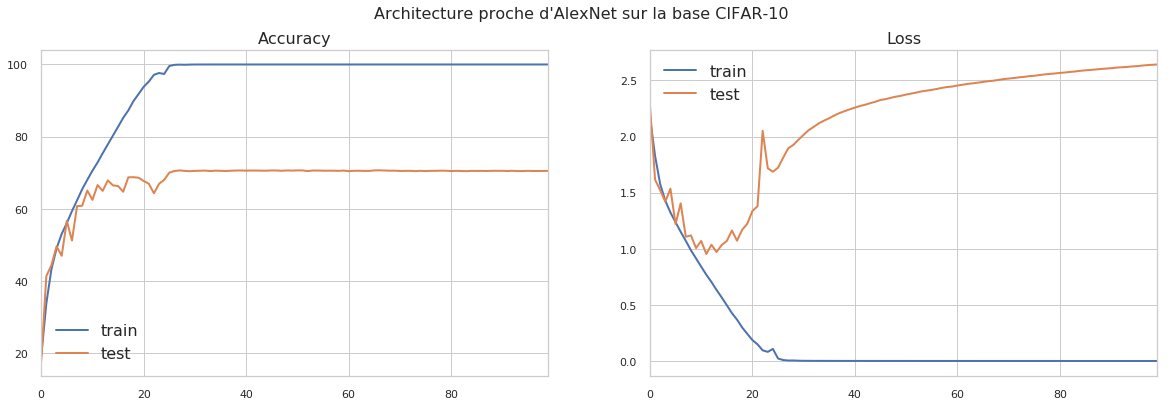

In [105]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(ncols=2, figsize=(20, 6))
loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2)
loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2)
ax[0].set_title('Accuracy', fontsize=16)
ax[0].legend(['train', 'test'], fontsize=16)
ax[1].set_title('Loss', fontsize=16)
ax[1].legend(['train', 'test'], fontsize=16)
fig.suptitle('Architecture proche d\'AlexNet sur la base CIFAR-10', fontsize=16);

### 16

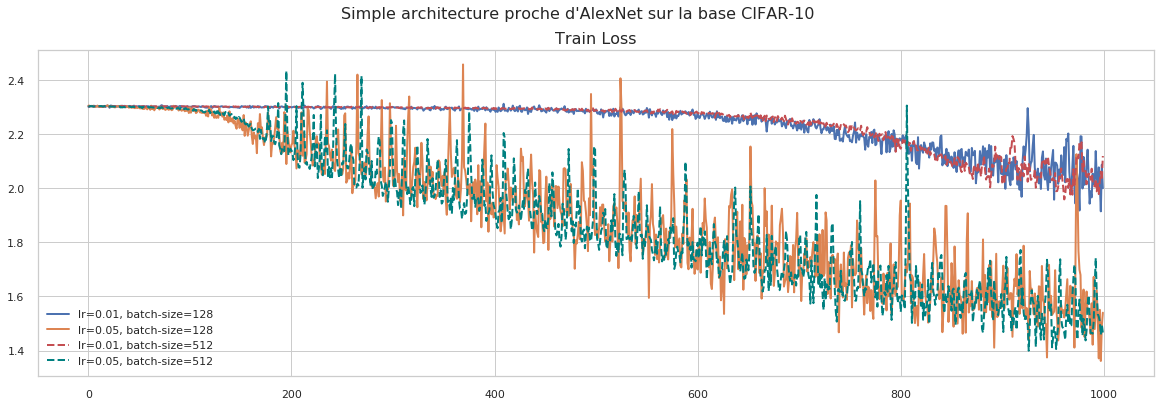

In [104]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(ncols=1, figsize=(20, 6))
batches = 1000
ax = plt.plot(range(batches), train_loss_001.iloc[:batches], linewidth=2, label='lr=0.01, batch-size=128')
ax = plt.plot(range(batches), train_loss.iloc[:batches], linewidth=2, label='lr=0.05, batch-size=128')
ax = plt.plot(range(batches), train_loss_001_512.iloc[:batches], linewidth=2, label='lr=0.01, batch-size=512',linestyle='--', color='r')
ax = plt.plot(range(batches), train_loss_512.iloc[:batches], linewidth=2, label='lr=0.05, batch-size=512', linestyle='--', color='teal')

plt.title('Train Loss', fontsize=16)
plt.legend()
fig.suptitle('Simple architecture proche d\'AlexNet sur la base CIFAR-10', fontsize=16);

### 19

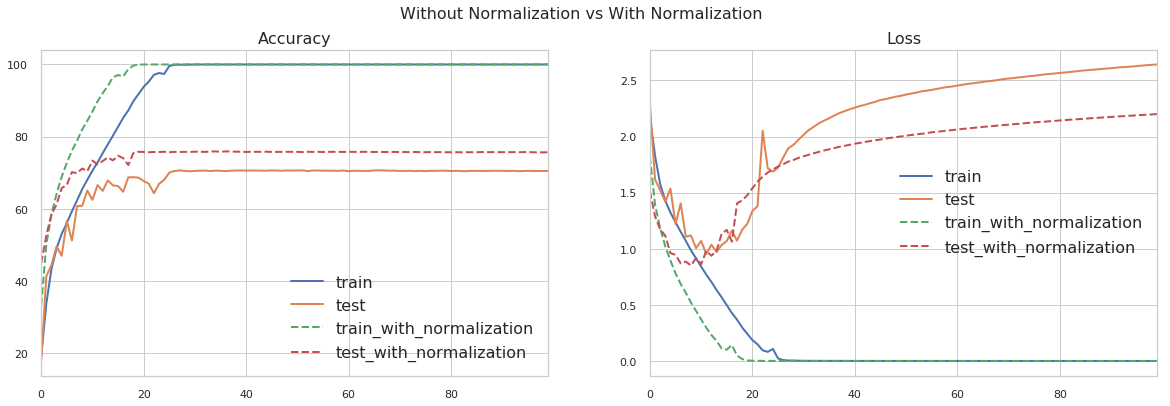

In [110]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(ncols=2, figsize=(20, 6))
loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2)
loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2)

norm_loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2, linestyle='--')
norm_loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2, linestyle='--')

ax[0].set_title('Accuracy', fontsize=16)
ax[0].legend(['train', 'test', 'train_with_normalization', 'test_with_normalization'], fontsize=16)
ax[1].set_title('Loss', fontsize=16)
ax[1].legend(['train', 'test', 'train_with_normalization', 'test_with_normalization'], fontsize=16)

fig.suptitle('Without Normalization vs With Normalization', fontsize=16);

### 21

### 22

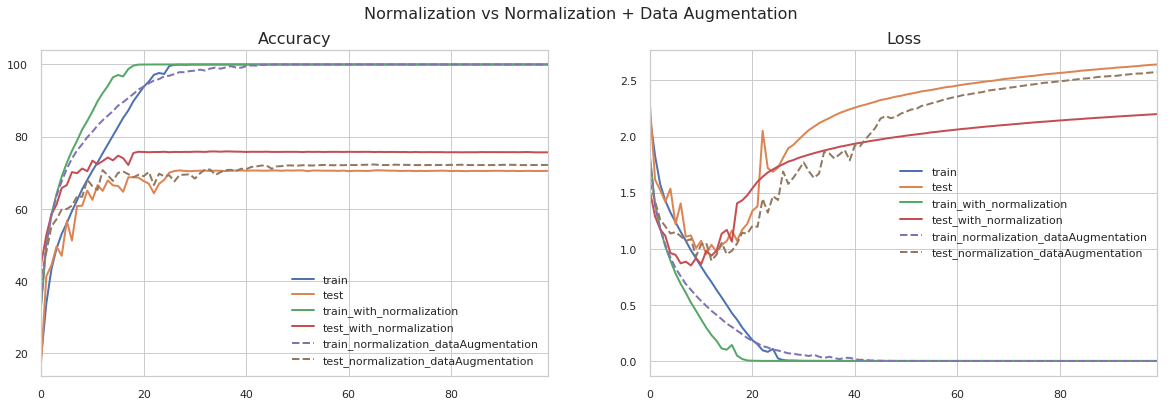

In [102]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(ncols=2, figsize=(20, 6))

loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2)
loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2)

norm_loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2)
norm_loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2)

data_augmentation_loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2, linestyle='--')
data_augmentation_loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2, linestyle='--')

ax[0].set_title('Accuracy', fontsize=16)
ax[0].legend(['train', 'test', 
              'train_with_normalization', 'test_with_normalization',
              'train_normalization_dataAugmentation',
              'test_normalization_dataAugmentation'])
ax[1].set_title('Loss', fontsize=16)
ax[1].legend(['train', 'test', 
              'train_with_normalization', 'test_with_normalization',
              'train_normalization_dataAugmentation',
              'test_normalization_dataAugmentation'])

fig.suptitle('Normalization vs Normalization + Data Augmentation', fontsize=16);

### 26

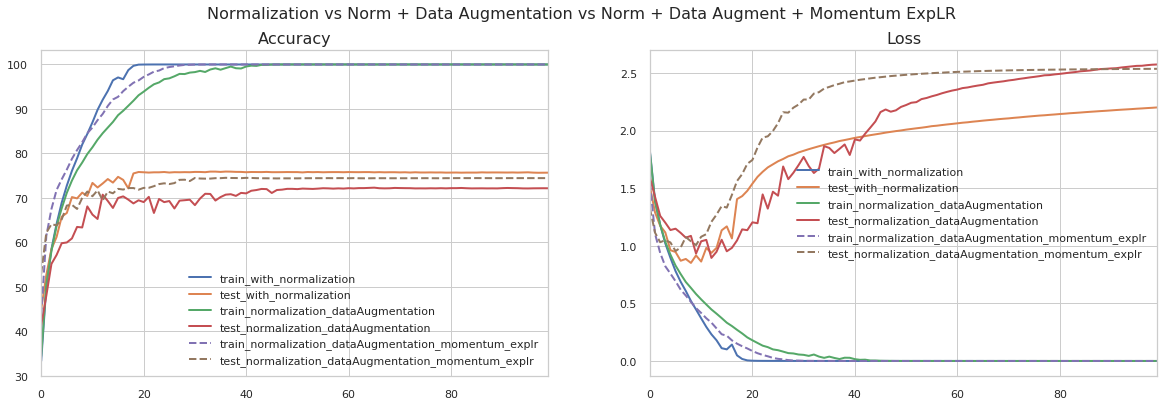

In [101]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(ncols=2, figsize=(20, 6))

norm_loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2)
norm_loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2)

data_augmentation_loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2)
data_augmentation_loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2)

momentum_expLR_loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2, linestyle='--')
momentum_expLR_loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2, linestyle='--')

ax[0].set_title('Accuracy', fontsize=16)
ax[0].legend(['train_with_normalization', 'test_with_normalization',
              'train_normalization_dataAugmentation',
              'test_normalization_dataAugmentation',
              'train_normalization_dataAugmentation_momentum_explr',
              'test_normalization_dataAugmentation_momentum_explr'])
ax[1].set_title('Loss', fontsize=16)
ax[1].legend(['train_with_normalization', 'test_with_normalization',
              'train_normalization_dataAugmentation',
              'test_normalization_dataAugmentation',
              'train_normalization_dataAugmentation_momentum_explr',
              'test_normalization_dataAugmentation_momentum_explr'])

fig.suptitle('Normalization vs Norm + Data Augmentation vs Norm + Data Augment + Momentum ExpLR', fontsize=16);

### 28

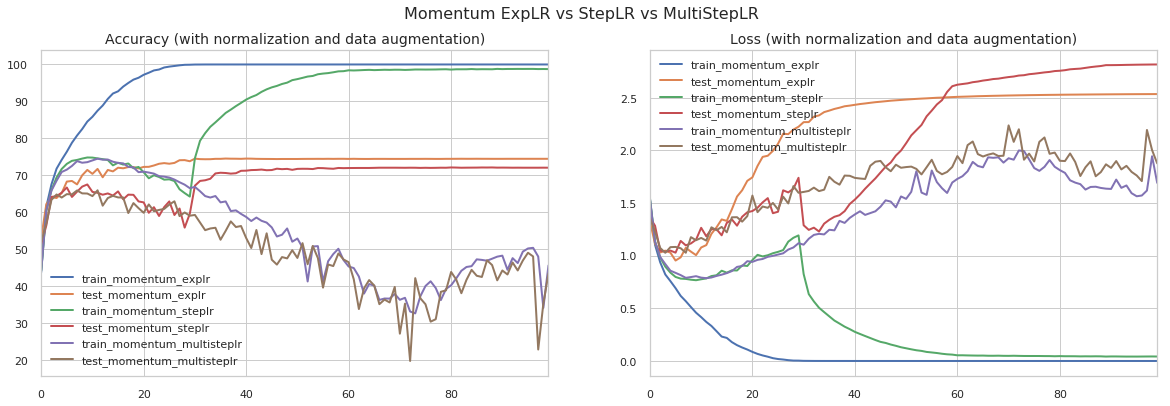

In [100]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(ncols=2, figsize=(20, 6))


momentum_expLR_loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2)
momentum_expLR_loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2)

momentum_stepLR_loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2)
momentum_stepLR_loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2)

momentum_multistepLR_loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2)
momentum_multistepLR_loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2)


ax[0].set_title('Accuracy (with normalization and data augmentation)', fontsize=14)
ax[0].legend(['train_momentum_explr',
              'test_momentum_explr',
              'train_momentum_steplr',
              'test_momentum_steplr',
              'train_momentum_multisteplr',
              'test_momentum_multisteplr'])
ax[1].set_title('Loss (with normalization and data augmentation)', fontsize=14)
ax[1].legend(['train_momentum_explr',
              'test_momentum_explr',
              'train_momentum_steplr',
              'test_momentum_steplr',
              'train_momentum_multisteplr',
              'test_momentum_multisteplr'])

fig.suptitle('Momentum ExpLR vs StepLR vs MultiStepLR', fontsize=16);

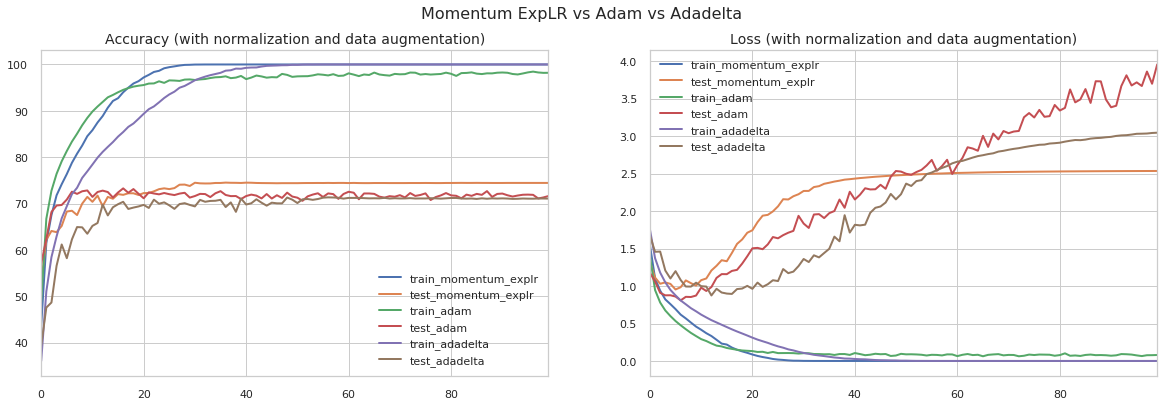

In [99]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(ncols=2, figsize=(20, 6))


momentum_expLR_loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2)
momentum_expLR_loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2)

adam_loss_acc_0001.iloc[:, 2:].plot(ax=ax[0], linewidth=2)
adam_loss_acc_0001.iloc[:, :2].plot(ax=ax[1], linewidth=2)

adadelta_loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2)
adadelta_loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2)

ax[0].set_title('Accuracy (with normalization and data augmentation)', fontsize=14)
ax[0].legend(['train_momentum_explr',
              'test_momentum_explr',
              'train_adam', 'test_adam',
              'train_adadelta', 'test_adadelta'])
ax[1].set_title('Loss (with normalization and data augmentation)', fontsize=14)
ax[1].legend(['train_momentum_explr',
              'test_momentum_explr',
              'train_adam', 'test_adam',
              'train_adadelta', 'test_adadelta'])

fig.suptitle('Momentum ExpLR vs Adam vs Adadelta', fontsize=16);

### 29

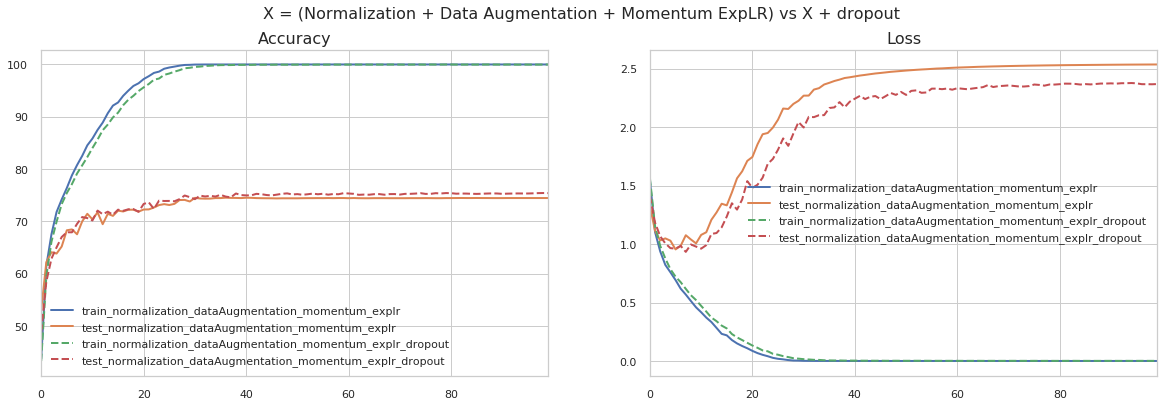

In [108]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(ncols=2, figsize=(20, 6))

momentum_expLR_loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2)
momentum_expLR_loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2)

dropout_loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2, linestyle='--')
dropout_loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2, linestyle='--')

ax[0].set_title('Accuracy', fontsize=16)
ax[0].legend(['train_normalization_dataAugmentation_momentum_explr',
              'test_normalization_dataAugmentation_momentum_explr',
              'train_normalization_dataAugmentation_momentum_explr_dropout',
              'test_normalization_dataAugmentation_momentum_explr_dropout'])
ax[1].set_title('Loss', fontsize=16)
ax[1].legend(['train_normalization_dataAugmentation_momentum_explr',
              'test_normalization_dataAugmentation_momentum_explr',
              'train_normalization_dataAugmentation_momentum_explr_dropout',
              'test_normalization_dataAugmentation_momentum_explr_dropout'])

fig.suptitle('X = (Normalization + Data Augmentation + Momentum ExpLR) vs X + dropout', fontsize=16);

### 34

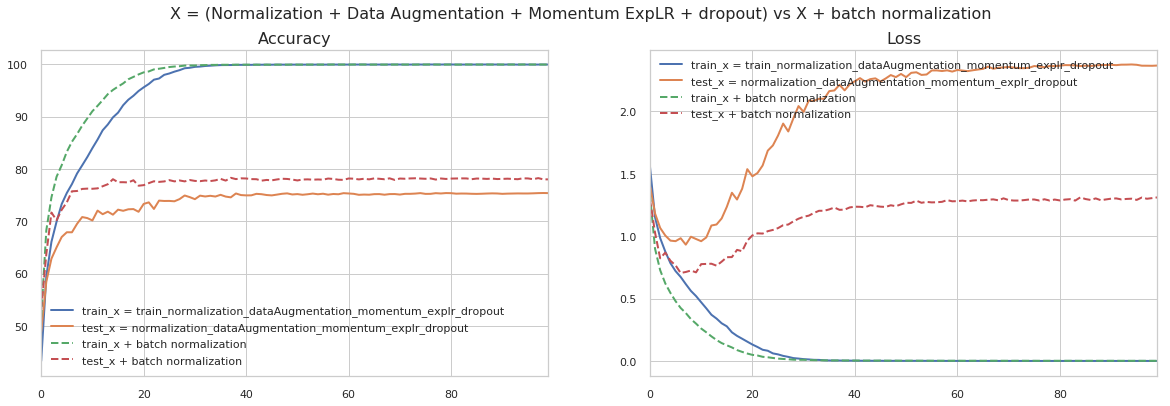

In [109]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(ncols=2, figsize=(20, 6))

dropout_loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2)
dropout_loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2)

batch_norm_loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2, linestyle='--')
batch_norm_loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2, linestyle='--')

ax[0].set_title('Accuracy', fontsize=16)
ax[0].legend(['train_x = train_normalization_dataAugmentation_momentum_explr_dropout',
              'test_x = normalization_dataAugmentation_momentum_explr_dropout',
              'train_x + batch normalization',
              'test_x + batch normalization'])
ax[1].set_title('Loss', fontsize=16)
ax[1].legend(['train_x = train_normalization_dataAugmentation_momentum_explr_dropout',
              'test_x = normalization_dataAugmentation_momentum_explr_dropout',
              'train_x + batch normalization',
              'test_x + batch normalization'])

fig.suptitle('X = (Normalization + Data Augmentation + Momentum ExpLR + dropout) vs X + batch normalization', fontsize=16);

### All

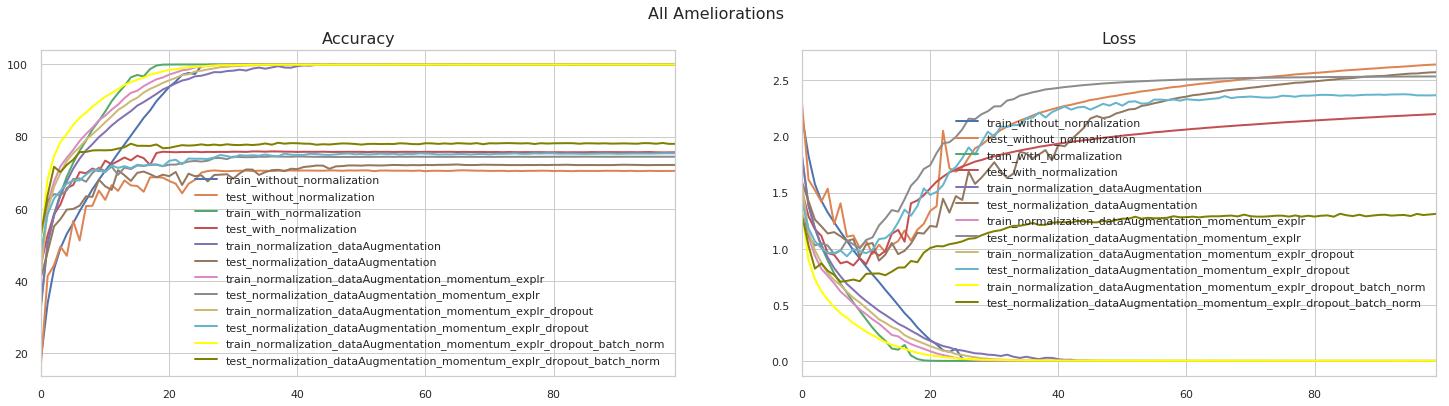

In [127]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(ncols=2, figsize=(25, 6))

loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2)
loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2)

norm_loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2)
norm_loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2)

data_augmentation_loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2)
data_augmentation_loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2)

momentum_expLR_loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2)
momentum_expLR_loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2)

dropout_loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2)
dropout_loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2)

batch_norm_loss_acc.iloc[:, 2:].plot(ax=ax[0], linewidth=2, color=['yellow', 'olive'])
batch_norm_loss_acc.iloc[:, :2].plot(ax=ax[1], linewidth=2, color=['yellow', 'olive'])

ax[0].set_title('Accuracy', fontsize=16)
ax[0].legend(['train_without_normalization', 'test_without_normalization',
              'train_with_normalization', 'test_with_normalization',
              'train_normalization_dataAugmentation',
              'test_normalization_dataAugmentation',
              'train_normalization_dataAugmentation_momentum_explr',
              'test_normalization_dataAugmentation_momentum_explr',
              'train_normalization_dataAugmentation_momentum_explr_dropout',
              'test_normalization_dataAugmentation_momentum_explr_dropout',
              'train_normalization_dataAugmentation_momentum_explr_dropout_batch_norm',
              'test_normalization_dataAugmentation_momentum_explr_dropout_batch_norm'])
ax[1].set_title('Loss', fontsize=16)
ax[1].legend(['train_without_normalization', 'test_without_normalization',
              'train_with_normalization', 'test_with_normalization',
              'train_normalization_dataAugmentation',
              'test_normalization_dataAugmentation',
              'train_normalization_dataAugmentation_momentum_explr',
              'test_normalization_dataAugmentation_momentum_explr',
              'train_normalization_dataAugmentation_momentum_explr_dropout',
              'test_normalization_dataAugmentation_momentum_explr_dropout',
              'train_normalization_dataAugmentation_momentum_explr_dropout_batch_norm',
              'test_normalization_dataAugmentation_momentum_explr_dropout_batch_norm'])

fig.suptitle('All Ameliorations', fontsize=16);